# Model to Detect Fraudulent Credit Card Transactions

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler



In [46]:
train_df=pd.read_csv('./Task 2 Data/fraudTrain.csv')
test_df=pd.read_csv('./Task 2 Data/fraudTest.csv')

In [47]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [48]:
train_df['job'].value_counts()

Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: job, Length: 494, dtype: int64

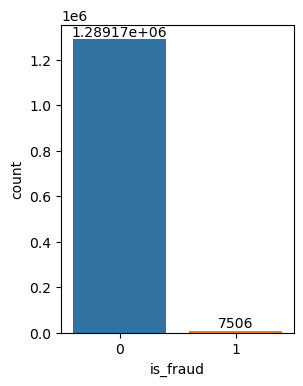

In [49]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='is_fraud',data=train_df,)
for i in ax.containers:
    ax.bar_label(i,)

In [50]:
print('Genuine:', round(train_df['is_fraud'].value_counts()[0]/len(train_df) * 100,2), '% of the dataset')
print('Frauds:', round(train_df['is_fraud'].value_counts()[1]/len(train_df) * 100,2), '% of the dataset')

Genuine: 99.42 % of the dataset
Frauds: 0.58 % of the dataset


In [54]:
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(None, None)

In [11]:
drop_columns = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip']
train_df.drop(columns=drop_columns,inplace=True)
test_df.drop(columns=drop_columns,inplace=True)

In [13]:
train_df.head(3)

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0
1,2020-06-21 12:14:33,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0
2,2020-06-21 12:14:53,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0


In [16]:
train_df['trans_date_trans_time']=pd.to_datetime(train_df['trans_date_trans_time'])
train_df['trans_date']=train_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train_df['trans_date']=pd.to_datetime(train_df['trans_date'])
train_df['dob']=pd.to_datetime(train_df['dob'])

test_df['trans_date_trans_time']=pd.to_datetime(test_df['trans_date_trans_time'])
test_df['trans_date']=test_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test_df['trans_date']=pd.to_datetime(test_df['trans_date'])
test_df['dob']=pd.to_datetime(test_df['dob'])

In [17]:
train_df["age"] = train_df["trans_date"]-train_df["dob"]
train_df["age"]=train_df["age"].astype('timedelta64[Y]')

test_df["age"] = test_df["trans_date"]-test_df["dob"]
test_df["age"]=test_df["age"].astype('timedelta64[Y]')

In [18]:
train_df['trans_month'] = pd.DatetimeIndex(train_df['trans_date']).month
train_df['trans_year'] = pd.DatetimeIndex(train_df['trans_date']).year

In [19]:
train_df['latitudinal_distance'] = abs(round(train_df['merch_lat']-train_df['lat'],3))
train_df['longitudinal_distance'] = abs(round(train_df['merch_long']-train_df['long'],3))

test_df['latitudinal_distance'] = abs(round(test_df['merch_lat']-test_df['lat'],3))
test_df['longitudinal_distance'] = abs(round(test_df['merch_long']-test_df['long'],3))

In [20]:
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
train_df.drop(columns=drop_columns,inplace=True)
test_df.drop(columns=drop_columns,inplace=True)

In [21]:
train_df.gender=train_df.gender.apply(lambda x: 1 if x=="M" else 0)
test_df.gender=test_df.gender.apply(lambda x: 1 if x=="M" else 0)

In [22]:
train_df = pd.get_dummies(train_df, columns=['category'], prefix='category')
test_df = pd.get_dummies(test_df, columns=['category'], prefix='category')

test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

In [23]:
train_df.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52.0,6,2020,0.020,0.265,0,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302,0,30.0,6,2020,0.870,0.476,0,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0,34496,0,49.0,6,2020,0.177,0.660,0,...,0,1,0,0,0,0,0,0,0,0
3,60.05,1,54767,0,32.0,6,2020,0.243,0.064,0,...,0,0,0,0,0,1,0,0,0,0
4,3.19,1,1126,0,64.0,6,2020,0.706,0.868,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
test_df.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30.0,0,0,0.068,0.870,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,40.0,0,0,0.271,0.024,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,56.0,0,0,0.970,0.108,1,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,51.0,0,0,0.804,0.447,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,32.0,0,0,0.254,0.830,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']

X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

In [26]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 1. Logistic Regression

In [28]:
from sklearn.metrics import accuracy_score
LRModel=LogisticRegression(solver='liblinear', multi_class='auto',C=10)
LRModel.fit(X_train, y_train)
y_pred = LRModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
score=[]
score.append(['Logistic Regression',accuracy])


Accuracy: 0.8646168083752676


### 2. Decision Tree

In [29]:
DTModel = DecisionTreeClassifier(random_state=42)
DTModel.fit(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
score.append(['Decision TreeC Classifier',accuracy])


Accuracy: 0.8646168083752676


### 3. Random Forest

In [30]:
RFModel = RandomForestClassifier(n_estimators=100, random_state=42)
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
score.append(['Random Forest Classifier',accuracy])


Accuracy: 0.9968403802032121


In [31]:
score

[['Logistic Regression', 0.8646168083752676],
 ['Decision TreeC Classifier', 0.8646168083752676],
 ['Random Forest Classifier', 0.9968403802032121]]